### Abalone Case Study
Problem Statement:
The age of abalone is determined by cutting the shell through the cone, staining it, and counting the number of rings through a microscope -- a boring and time-consuming task. Other measurements, which are easier to obtain, are used to predict the age. Further information, such as weather patterns and location (hence food availability) may be required to solve the problem.

Attribute Information

Given is the attribute name, attribute type, the measurement unit and a brief description. The number of rings is the value to predict. 

Name / Data Type / Measurement Unit / Description
-----------------------------
Sex / nominal / -- / M, F, and I (infant)
Length / continuous / mm / Longest shell measurement
Diameter / continuous / mm / perpendicular to length
Height / continuous / mm / with meat in shell
Whole weight / continuous / grams / whole abalone
Shucked weight / continuous / grams / weight of meat
Viscera weight / continuous / grams / gut weight (after bleeding)
Shell weight / continuous / grams / after being dried
Rings / integer / -- / +1.5 gives the age in years. 

You have to predict the rings of each abalone which will lead us to the age of that abalone. 

In [120]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression,Lasso,LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import AdaBoostRegressor,GradientBoostingRegressor
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.decomposition import PCA
from scipy.stats import zscore
from sklearn.model_selection import cross_val_score
import pickle as pkl

### Data Collection

In [121]:
df= pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/abalone.csv')
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)
display(df)

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
5,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.1200,8
6,F,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.3300,20
7,F,0.545,0.425,0.125,0.7680,0.2940,0.1495,0.2600,16
8,M,0.475,0.370,0.125,0.5095,0.2165,0.1125,0.1650,9
9,F,0.550,0.440,0.150,0.8945,0.3145,0.1510,0.3200,19


In [3]:
df.shape

(4177, 9)

In [4]:
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


<AxesSubplot:>

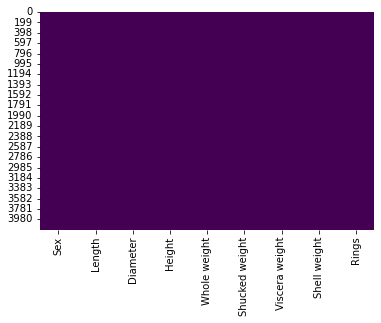

In [6]:
sns.heatmap(df.isnull(),cbar=False,cmap='viridis')

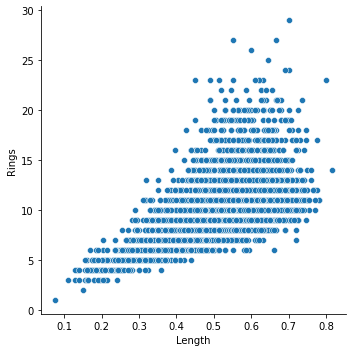

In [96]:
sns.relplot(x=df['Length'], y=df['Rings'], kind="scatter", ci="sd")

In [82]:
num = ['Length',
 'Diameter',
 'Height',
 'Whole weight',
 'Shucked weight',
 'Viscera weight',
 'Shell weight']

In [109]:
F_filter = df['Sex']=='F'
print(df[F_filter])

M_filter = df['Sex']=='M'
print(df[M_filter])

I_filter = df['Sex']=='I'
print(df[I_filter])

     Sex  Length  Diameter  Height  Whole weight  Shucked weight  \
2     F   0.530   0.420     0.135   0.6770        0.2565           
6     F   0.530   0.415     0.150   0.7775        0.2370           
7     F   0.545   0.425     0.125   0.7680        0.2940           
9     F   0.550   0.440     0.150   0.8945        0.3145           
10    F   0.525   0.380     0.140   0.6065        0.1940           
13    F   0.535   0.405     0.145   0.6845        0.2725           
14    F   0.470   0.355     0.100   0.4755        0.1675           
17    F   0.440   0.340     0.100   0.4510        0.1880           
22    F   0.565   0.440     0.155   0.9395        0.4275           
23    F   0.550   0.415     0.135   0.7635        0.3180           
24    F   0.615   0.480     0.165   1.1615        0.5130           
25    F   0.560   0.440     0.140   0.9285        0.3825           
26    F   0.580   0.450     0.185   0.9955        0.3945           
31    F   0.680   0.560     0.165   1.6390      

     Sex  Length  Diameter  Height  Whole weight  Shucked weight  \
0     M   0.455   0.365     0.095   0.5140        0.2245           
1     M   0.350   0.265     0.090   0.2255        0.0995           
3     M   0.440   0.365     0.125   0.5160        0.2155           
8     M   0.475   0.370     0.125   0.5095        0.2165           
11    M   0.430   0.350     0.110   0.4060        0.1675           
12    M   0.490   0.380     0.135   0.5415        0.2175           
15    M   0.500   0.400     0.130   0.6645        0.2580           
18    M   0.365   0.295     0.080   0.2555        0.0970           
19    M   0.450   0.320     0.100   0.3810        0.1705           
20    M   0.355   0.280     0.095   0.2455        0.0955           
27    M   0.590   0.445     0.140   0.9310        0.3560           
28    M   0.605   0.475     0.180   0.9365        0.3940           
29    M   0.575   0.425     0.140   0.8635        0.3930           
30    M   0.580   0.470     0.165   0.9975      

     Sex  Length  Diameter  Height  Whole weight  Shucked weight  \
4     I   0.330   0.255     0.080   0.2050        0.0895           
5     I   0.425   0.300     0.095   0.3515        0.1410           
16    I   0.355   0.280     0.085   0.2905        0.0950           
21    I   0.380   0.275     0.100   0.2255        0.0800           
42    I   0.240   0.175     0.045   0.0700        0.0315           
43    I   0.205   0.150     0.055   0.0420        0.0255           
44    I   0.210   0.150     0.050   0.0420        0.0175           
45    I   0.390   0.295     0.095   0.2030        0.0875           
48    I   0.325   0.245     0.070   0.1610        0.0755           
50    I   0.520   0.410     0.120   0.5950        0.2385           
58    I   0.245   0.190     0.060   0.0860        0.0420           
69    I   0.310   0.235     0.070   0.1510        0.0630           
100   I   0.360   0.265     0.095   0.2315        0.1050           
112   I   0.435   0.320     0.080   0.3325      

In [114]:
df[F_filter].columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')

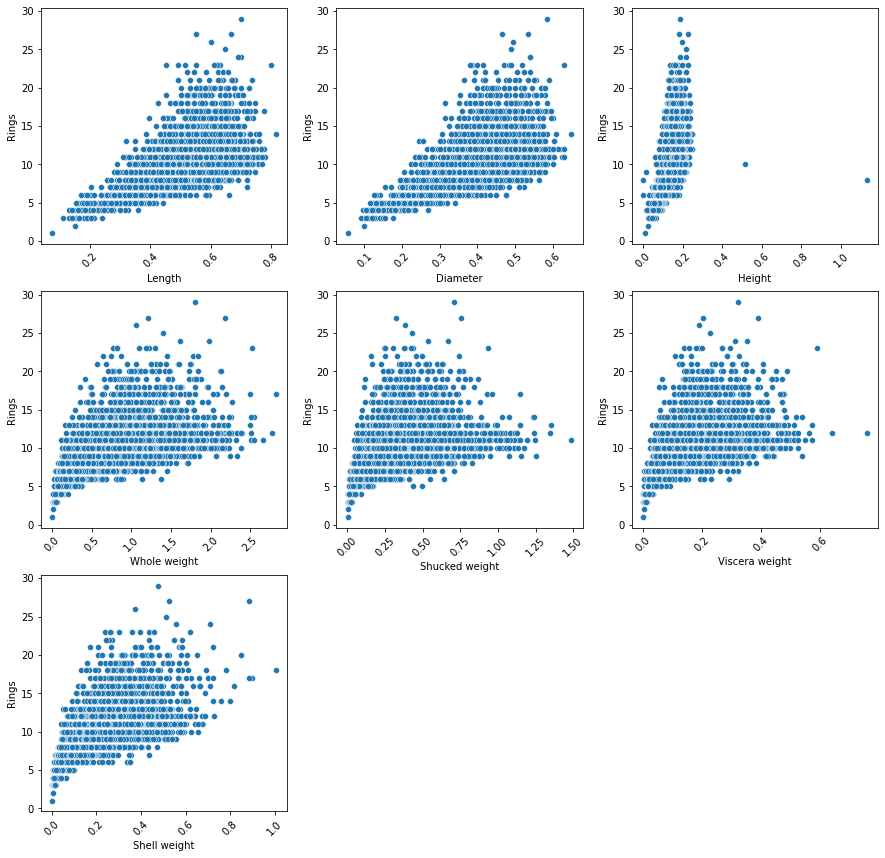

In [122]:
count=1
plt.subplots(figsize=(15, 20))
for i in num:
    plt.subplot(4,3,count)
    sns.scatterplot(x=df[i], y=df['Rings'], ci="sd")
    plt.xticks(rotation = 45)
    count+=1

plt.show()

<AxesSubplot:xlabel='Sex'>

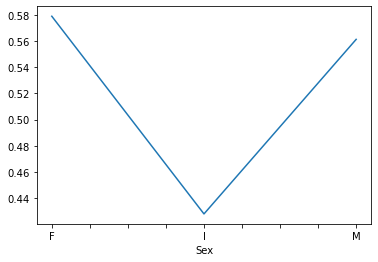

In [127]:
df.groupby(['Sex']).mean()['Length'].plot()

<AxesSubplot:xlabel='Sex'>

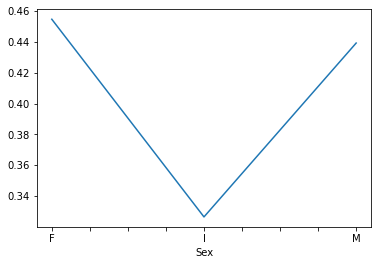

In [132]:
df.groupby(['Sex']).mean()['Diameter'].plot()

<AxesSubplot:xlabel='Sex'>

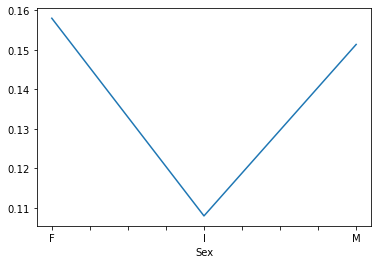

In [133]:
df.groupby(['Sex']).mean()['Height'].plot()

<AxesSubplot:xlabel='Sex'>

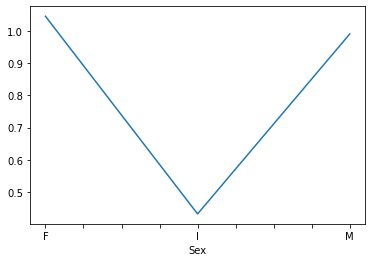

In [134]:
df.groupby(['Sex']).mean()['Whole weight'].plot()

<AxesSubplot:xlabel='Sex'>

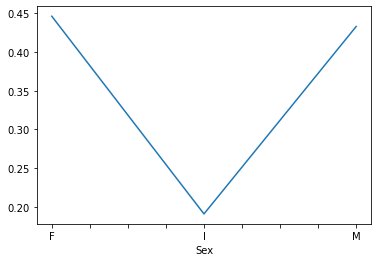

In [135]:
df.groupby(['Sex']).mean()['Shucked weight'].plot()

<AxesSubplot:xlabel='Sex'>

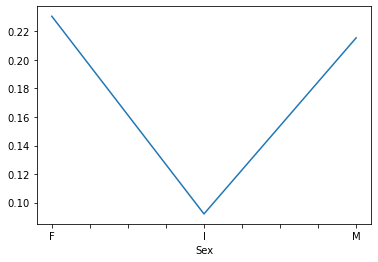

In [136]:
df.groupby(['Sex']).mean()['Viscera weight'].plot()

<AxesSubplot:xlabel='Sex'>

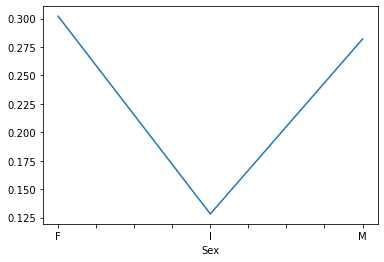

In [137]:
df.groupby(['Sex']).mean()['Shell weight'].plot()

In [10]:
columns=['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight']

<AxesSubplot:xlabel='Sex', ylabel='count'>

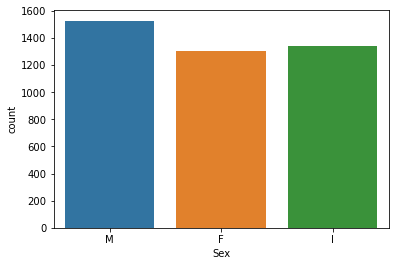

In [8]:
sns.countplot(df['Sex'])

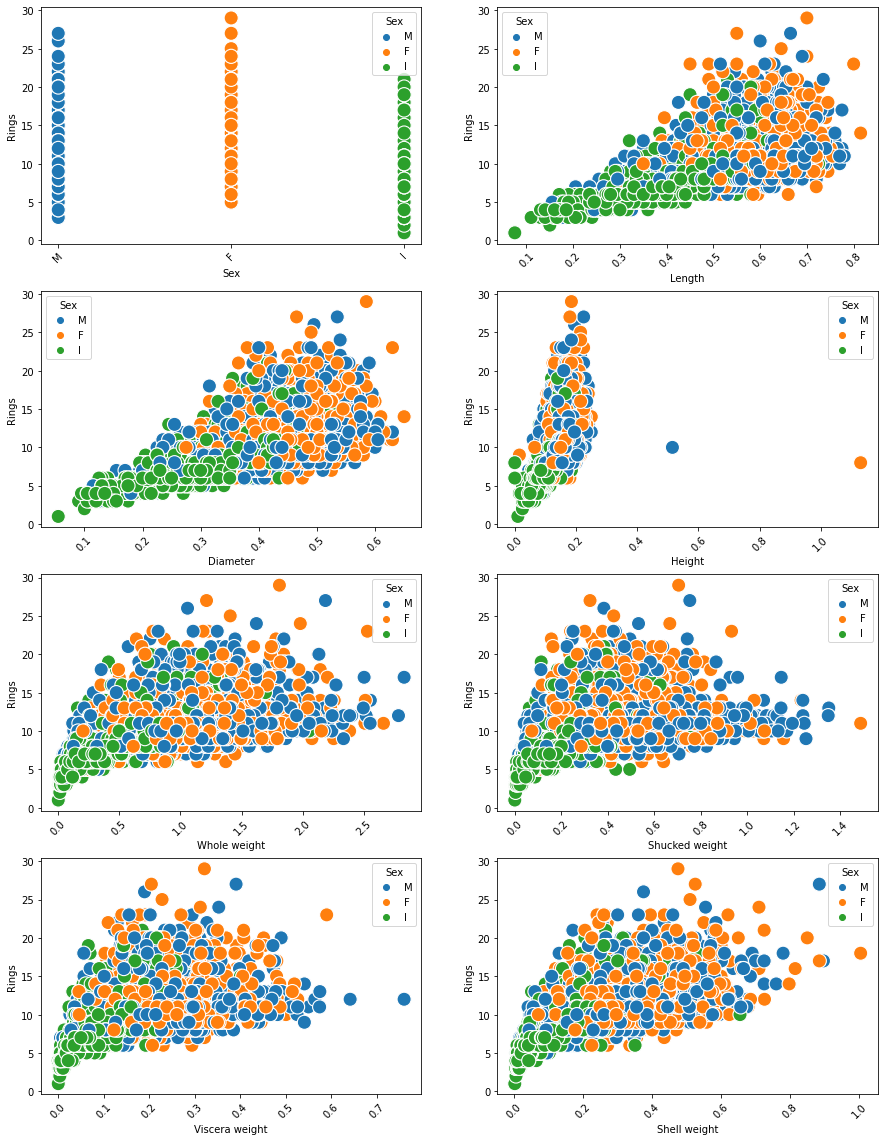

In [16]:
count=1
plt.subplots(figsize=(15, 20))
for i in columns:
    plt.subplot(4,2,count)
    sns.scatterplot(df[i],df['Rings'],hue=df['Sex'],s=200)
    plt.xticks(rotation = 45)
    count+=1

plt.show()

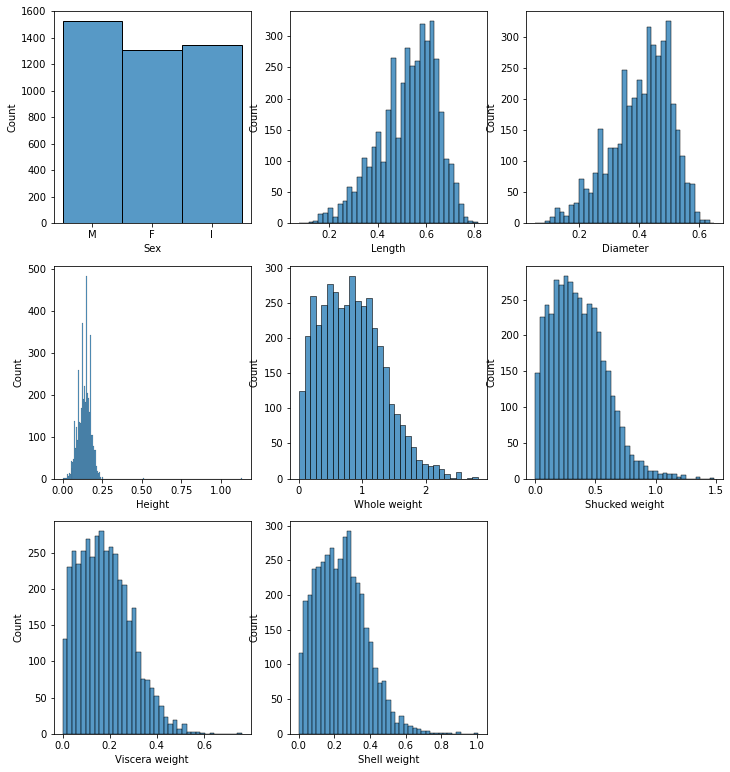

In [19]:
count=1
plt.subplots(figsize=(12, 18))
for i in columns:
    plt.subplot(4,3,count)
    sns.histplot(df[i])
    count+=1

plt.show()

In [20]:
lab = LabelEncoder()
df['Sex'] = lab.fit_transform(df['Sex'])

In [21]:
df.corr()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
Sex,1.000000,-0.036066,-0.038874,-0.042077,-0.021391,-0.001373,-0.032067,-0.034854,-0.034627
Length,-0.036066,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720
Diameter,-0.038874,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660
Height,-0.042077,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467
Whole weight,-0.021391,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390
Shucked weight,-0.001373,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884
Viscera weight,-0.032067,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819
Shell weight,-0.034854,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574
Rings,-0.034627,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000


<AxesSubplot:>

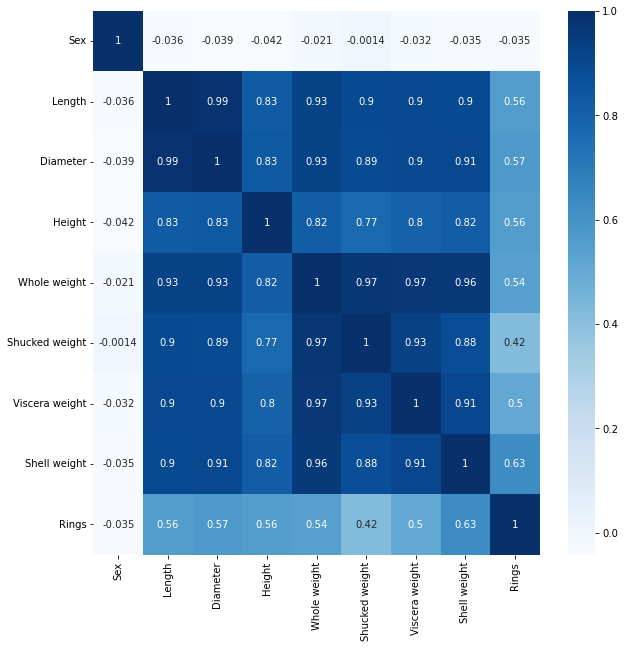

In [22]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),cbar=True,annot=True,cmap='Blues')

In [23]:
df.skew()

Sex              -0.098155
Length           -0.639873
Diameter         -0.609198
Height            3.128817
Whole weight      0.530959
Shucked weight    0.719098
Viscera weight    0.591852
Shell weight      0.620927
Rings             1.114102
dtype: float64

In [24]:
for i in columns :
    if df.skew().loc[i]>0.60:
        df[i] = np.log1p(df[i])

In [25]:
df.skew()

Sex              -0.098155
Length           -0.639873
Diameter         -0.609198
Height            1.099602
Whole weight      0.530959
Shucked weight    0.306439
Viscera weight    0.591852
Shell weight      0.315321
Rings             1.114102
dtype: float64

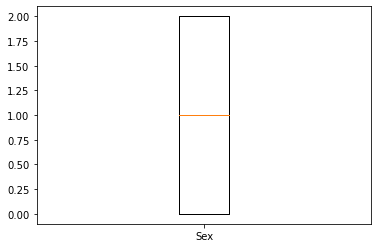

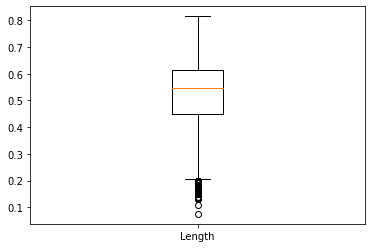

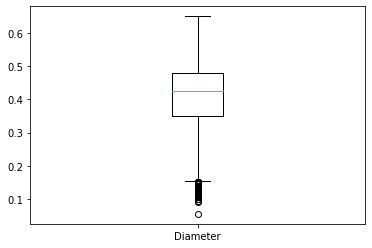

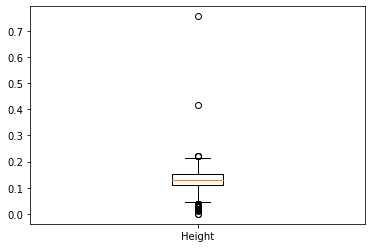

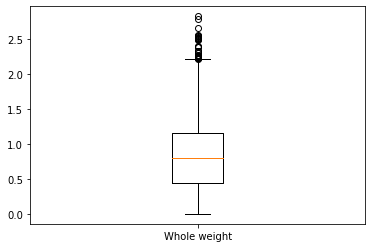

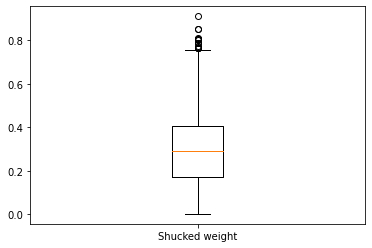

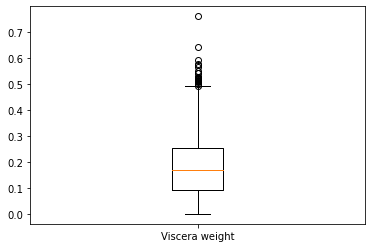

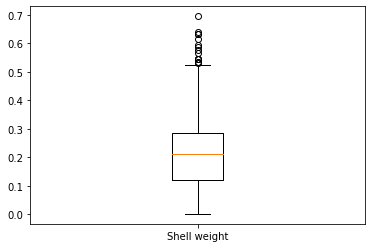

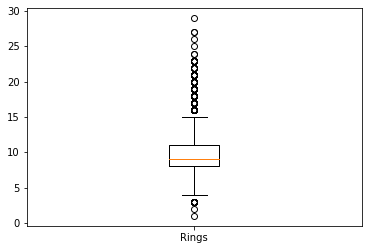

In [26]:
for i in df.columns:
    plt.boxplot(df[i], labels = [i])
    plt.show()

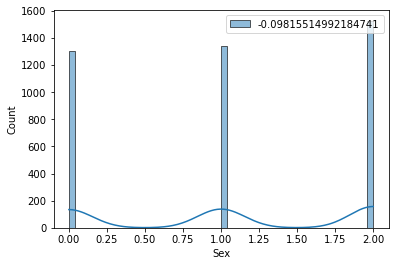

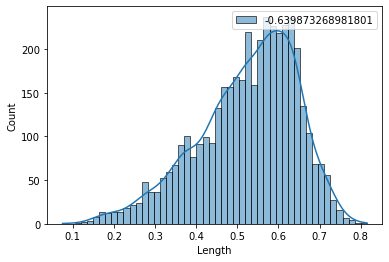

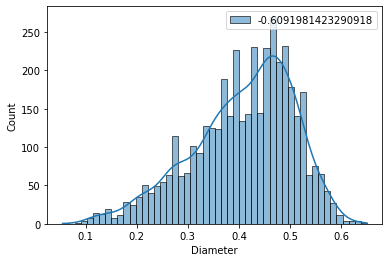

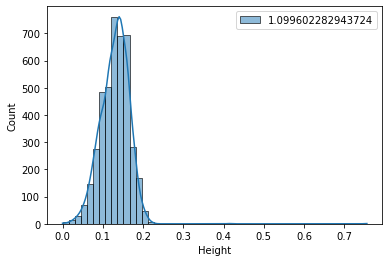

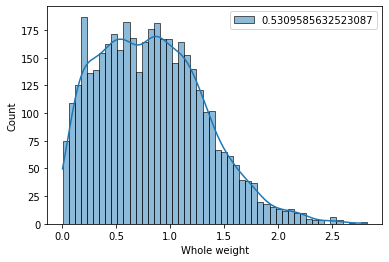

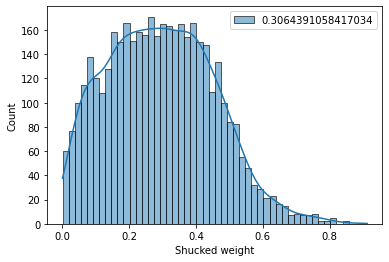

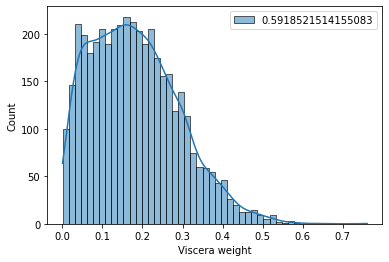

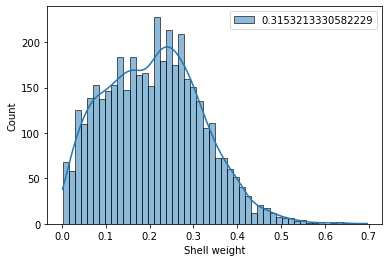

In [27]:
for i in columns:
    sns.histplot(df[i], kde = True, bins = 50, label = df[i].skew())
    plt.legend(loc = 'upper right')
    plt.show()

In [28]:
for i in columns:
    Q1,Q3 = np.percentile(df[i] , [25,75])
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    df_no_outliers = df[(df[i] < lower_range) | (df[i] > upper_range)]

In [29]:
df_no_outliers

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
129,2,0.710,0.540,0.152721,1.9590,0.569000,0.2610,0.576613,18
163,0,0.725,0.560,0.190620,2.1410,0.500775,0.3980,0.695644,18
164,0,0.650,0.545,0.207014,1.7520,0.445006,0.2895,0.596085,16
165,2,0.725,0.570,0.173953,2.5500,0.727790,0.4830,0.545227,14
166,0,0.725,0.575,0.161268,2.1240,0.568151,0.4515,0.615186,20
168,2,0.705,0.560,0.198851,1.9810,0.597462,0.3085,0.565314,14
334,0,0.740,0.600,0.178146,1.9740,0.468753,0.4085,0.536493,16
358,2,0.745,0.585,0.194744,2.4990,0.655705,0.4720,0.530628,17
891,2,0.730,0.595,0.207014,2.8255,0.763839,0.4190,0.640274,17
1428,0,0.815,0.650,0.223144,2.2550,0.636841,0.4200,0.586397,14


In [30]:
z = np.abs(zscore(df))
threshold = 3
print(np.where(z<3))
print(df.shape)

(array([   0,    0,    0, ..., 4176, 4176, 4176], dtype=int64), array([0, 1, 2, ..., 6, 7, 8], dtype=int64))
(4177, 9)


In [31]:
df_new = df[(z<3).all(axis = 1)]
df_new.shape

(4050, 9)

In [32]:
df.shape

(4177, 9)

In [33]:
X = df_new.drop(['Rings'],axis=1)
y = df_new['Rings']

In [34]:
from sklearn.preprocessing import StandardScaler

In [35]:
for i in X.columns:
    scaler = StandardScaler()
    X[i] = scaler.fit_transform(X[i].values.reshape(-1, 1))

In [36]:
reg_model = [LinearRegression(),GradientBoostingRegressor(),AdaBoostRegressor(),DecisionTreeRegressor(),KNeighborsRegressor(),ExtraTreesRegressor(),RandomForestRegressor()]
max_r2_score = 0
for r_state in range(42,95):
    X_train, X_test, y_train, y_test = train_test_split(X, y,random_state = r_state,test_size = 0.33)
    for i in reg_model:
        i.fit(X_train,y_train)
        pred = i.predict(X_test)
        r2_scores = r2_score(y_test,pred)
        print("R2 score for the random state is" ,r_state ,"is", r2_scores)
        if r2_scores > max_r2_score:
            max_r2_score = r2_scores
            final_state = r_state
            final_model = i
print()
print()
print()
print()
print("Maximum R2 score in the random state " ,final_state , "is" , max_r2_score ,"and model is",final_model)

R2 score for the random state is 42 is 0.49285219260196256
R2 score for the random state is 42 is 0.5100822899753615
R2 score for the random state is 42 is 0.3927120611880418
R2 score for the random state is 42 is 0.04505797511123133
R2 score for the random state is 42 is 0.44955722189075586
R2 score for the random state is 42 is 0.5076985939929028
R2 score for the random state is 42 is 0.5049520741777085
R2 score for the random state is 43 is 0.5002780779443283
R2 score for the random state is 43 is 0.5419694719985167
R2 score for the random state is 43 is 0.32824977339964645
R2 score for the random state is 43 is 0.1380506556672314
R2 score for the random state is 43 is 0.47019898319175457
R2 score for the random state is 43 is 0.5264948015518581
R2 score for the random state is 43 is 0.5273075115767633
R2 score for the random state is 44 is 0.5216774059286657
R2 score for the random state is 44 is 0.5663802648890945
R2 score for the random state is 44 is 0.344343253197371
R2 score f

R2 score for the random state is 62 is 0.5357830392182197
R2 score for the random state is 62 is 0.4024257691069518
R2 score for the random state is 62 is 0.18746532786514714
R2 score for the random state is 62 is 0.46466572208643
R2 score for the random state is 62 is 0.5294810517973038
R2 score for the random state is 62 is 0.5504830036369232
R2 score for the random state is 63 is 0.5188424210852137
R2 score for the random state is 63 is 0.541210372346568
R2 score for the random state is 63 is 0.4323618611868275
R2 score for the random state is 63 is 0.19171776638292892
R2 score for the random state is 63 is 0.49384524749189185
R2 score for the random state is 63 is 0.5379692715497364
R2 score for the random state is 63 is 0.5385926366746892
R2 score for the random state is 64 is 0.5135712147056763
R2 score for the random state is 64 is 0.5456435585439809
R2 score for the random state is 64 is 0.3881482016995583
R2 score for the random state is 64 is 0.08604917504742138
R2 score for 

R2 score for the random state is 82 is 0.15291361595119157
R2 score for the random state is 82 is 0.48110878626322473
R2 score for the random state is 82 is 0.5568359065557962
R2 score for the random state is 82 is 0.5669181582854376
R2 score for the random state is 83 is 0.5207458963206648
R2 score for the random state is 83 is 0.5349032562204021
R2 score for the random state is 83 is 0.38251553547303985
R2 score for the random state is 83 is 0.04352013690696699
R2 score for the random state is 83 is 0.46334284655880376
R2 score for the random state is 83 is 0.5200586344782249
R2 score for the random state is 83 is 0.5290430178490371
R2 score for the random state is 84 is 0.5165415634646546
R2 score for the random state is 84 is 0.544487093599723
R2 score for the random state is 84 is 0.34467360876585407
R2 score for the random state is 84 is 0.16751152775918787
R2 score for the random state is 84 is 0.4885096054255481
R2 score for the random state is 84 is 0.5425696441917373
R2 score

In [37]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 10)]
max_features = ['auto', 'sqrt','log2']
max_depth = [int(x) for x in np.linspace(10, 1000,10)]
min_samples_split = [2, 5, 10,14]
min_samples_leaf = [1, 2, 4,6,8]

In [40]:
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              }
print(param_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000], 'min_samples_split': [2, 5, 10, 14], 'min_samples_leaf': [1, 2, 4, 6, 8]}


In [42]:
GBR=GradientBoostingRegressor()
RandomizedSearch_GBR=RandomizedSearchCV(estimator=GBR,param_distributions=param_grid,n_iter=100,cv=3,verbose=2,
                               random_state=91,n_jobs=-1)
RandomizedSearch_GBR.fit(X_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=GradientBoostingRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'max_depth': [10, 120, 230, 340, 450,
                                                      560, 670, 780, 890,
                                                      1000],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 5, 10, 14],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000]},
                   random_state=91, verbose=2)

In [43]:
RandomizedSearch_GBR.best_params_

{'n_estimators': 900,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 780}

In [44]:
RandomizedSearch_GBR.best_estimator_

GradientBoostingRegressor(max_depth=780, max_features='sqrt',
                          min_samples_leaf=2, n_estimators=900)

In [45]:
GBR = GradientBoostingRegressor(n_estimators=780,min_samples_split=2,min_samples_leaf=1,max_features='sqrt',max_depth=780,random_state=91)
GBR.fit(X_train,y_train)
pred = GBR.predict(X_test)
r2_scores = r2_score(y_test,pred)
print("R2 Score :",r2_scores*100)

R2 Score : 51.48610087151022


In [46]:
print('Mean Absolute Error: ', mean_absolute_error(y_test,pred))
print('Mean squared Error: ', mean_squared_error(y_test,pred))
print('Root Mean Absolute Error: ', np.sqrt(mean_absolute_error(y_test,pred)))

Mean Absolute Error:  1.45717974874103
Mean squared Error:  3.9939122299866305
Root Mean Absolute Error:  1.207137004958853


Text(0, 0.5, 'Predicted_Y')

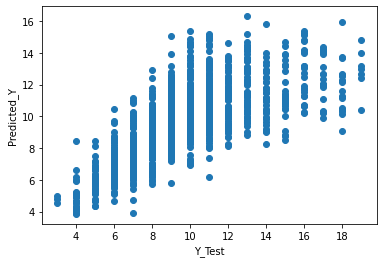

In [47]:
plt.scatter(x=y_test,y=pred)
plt.xlabel('Y_Test')
plt.ylabel('Predicted_Y')

In [48]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score,roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier

In [99]:
print('Mean Absolute Error: ', mean_absolute_error(y_test,pred))
print('Mean squared Error: ', mean_squared_error(y_test,pred))
print('Root Mean Absolute Error: ', np.sqrt(mean_absolute_error(y_test,pred)))

Mean Absolute Error:  0.08554802052785923
Mean squared Error:  0.07046541193181817
Root Mean Absolute Error:  0.2924859321879588


Text(0, 0.5, 'Predicted_Y')

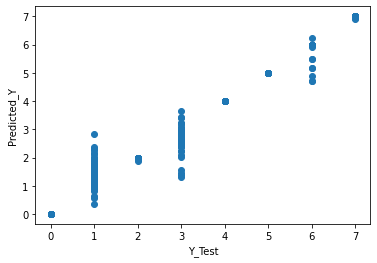

In [100]:
plt.scatter(x=y_test,y=pred)
plt.xlabel('Y_Test')
plt.ylabel('Predicted_Y')

In [101]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score,roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier

In [51]:
classification_model = [DecisionTreeClassifier(),KNeighborsClassifier()]
max_accuracy_score = 0
for r_state in range(40,90):
    X_train, X_test, y_train, y_test = train_test_split(X, y,random_state = r_state,test_size = 0.33)
    for j in classification_model:
        j.fit(X_train,y_train)
        pred_c = j.predict(X_test)
        ac_score = accuracy_score(y_test,pred_c)
        print("accuracy score correspond to random state " ,r_state ,"is", ac_score)
        if ac_score> max_accuracy_score:
            max_accuracy_score=ac_score
            final_state = r_state
            final_model_classification = j
            
print()
print()
print()
print()

print("max accuracy score correspond to random state " ,final_state , "is" , max_accuracy_score ,"and model is",final_model_classification)

accuracy score correspond to random state  40 is 0.21091997008227376
accuracy score correspond to random state  40 is 0.2169035153328347
accuracy score correspond to random state  41 is 0.1944652206432311
accuracy score correspond to random state  41 is 0.20867614061331338
accuracy score correspond to random state  42 is 0.21241585639491398
accuracy score correspond to random state  42 is 0.2198952879581152
accuracy score correspond to random state  43 is 0.2281226626776365
accuracy score correspond to random state  43 is 0.22288706058339566
accuracy score correspond to random state  44 is 0.1974569932685116
accuracy score correspond to random state  44 is 0.225130890052356
accuracy score correspond to random state  45 is 0.2169035153328347
accuracy score correspond to random state  45 is 0.2169035153328347
accuracy score correspond to random state  46 is 0.20792819745699326
accuracy score correspond to random state  46 is 0.2243829468960359
accuracy score correspond to random state  4

In [56]:
KNC = KNeighborsClassifier()
KNC.fit(X_train,y_train)
predc = KNC.predict(X_test)
acurracy_score = accuracy_score(y_test,predc)
print("Accuracy Score :",acurracy_score*100)

Accuracy Score : 23.036649214659686


### Pipeline

### Pipeline with 3 features

In [57]:
from sklearn.pipeline import Pipeline,make_pipeline
pipeline_lr=Pipeline([('scalar1',StandardScaler()),
                     ('pca1',PCA(n_components=3)),
                     ('lr_regressor',LinearRegression())])

In [59]:
pipeline_dt=Pipeline([('scalar2',StandardScaler()),
                     ('pca2',PCA(n_components=3)),
                     ('rf_regressor',GradientBoostingClassifier())])

In [60]:
pipeline_kn=Pipeline([('scalar2',StandardScaler()),
                     ('pca2',PCA(n_components=3)),
                     ('rf_regressor',KNeighborsRegressor())])

In [61]:
pipelines = [pipeline_lr, pipeline_dt,pipeline_kn]

In [62]:
best_accuracy=0.0
best_classifier=0
best_pipeline=""

In [64]:
pipe_dict = {0: 'Linear Regression',1:'GradientBoostingClassifier',2:'KNeighborsRegressor'}

for pipe in pipelines:
    pipe.fit(X_train, y_train)

In [65]:
pred = pipe.predict(X_test)
r2_scores = r2_score(y_test,pred)
print("R2 Score :",r2_scores*100)

R2 Score : 34.275788999314415


### Conclusion
• Import the Abalone Case Study dataset

• It contains 4177 rows and 9 columns

• Out of these 1 feature is categorical and remaining features are continous

• From the plots, we can come to the following conclusion: 
    •    We have three categories in target feature

    •    In general,for all features, females have higher features,then males, and infant have much lower when compared to others 

    •    From the count plot,we find that most of them are professors,with discipline A and are male.

       
• From the heatmap, we find that features are not highly corelated when compared to others

• Categories features are converted to continuous features by using Label encoding

• If skewness is more than 0.55 it is transformed logarithmically

• If outliers are present, it is used by IQR proximity and Z-score method

The model is evaluated by using regression

•    Of the regression algorithms:

•    GradientBoostingRegressor of random state 91 give more accuracy


•    From this we get the best parameters, final R2 Score : 51.53.

        1. Mean Absolute Error:  1.45717974874103
        2. Mean squared Error:  3.9939122299866305
        3. Root Mean Absolute Error:  1.207137004958853

Thus, we conclude that GradientBoostingRegressor algorithm gives the maximum accuracy of 51% and the attribution of the no of rings  can be predicted by this algorithm